In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

In [56]:
EMI_PATH = r"Z:\TekBox_EMI_Calibration\TEKBOX 1.29.26 TESTS\OTHER LISN\NEUTRAL\10M-comb-NEUTRAL.csv"
NEW_PATH = r'C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\10M-ATTEN166-NEUTRAL.csv'

In [57]:
with open(EMI_PATH, 'r', encoding='utf-8') as f:
    content = f.read()
    # print(content)

In [58]:
content = content.replace(' ', '')
content = content.replace(',', '.')
content = content.replace(';', ',')
content = "Frequency (Hz),Amplitude (dBm)\n" + content
print(content)



with open(NEW_PATH, 'w') as file:
    file.write(content)


Frequency (Hz),Amplitude (dBm)
10000000,-45.09
10009000,-64.76
10018000,-77.74
10027000,-82.15
10036000,-82.49
10045000,-83.86
10054000,-83.96
10063000,-83.38
10072000,-80.95
10081000,-83.77
10090000,-83.57
10099000,-82.07
10108000,-85.26
10117000,-82.83
10126000,-81.31
10135000,-83.7
10144000,-84.52
10153000,-84.52
10162000,-85.08
10171000,-84.2
10180000,-84.52
10189000,-84
10198000,-82.42
10207000,-81.85
10216000,-83.7
10225000,-84.74
10234000,-84.31
10243000,-84
10252000,-84.2
10261000,-85.31
10270000,-82.42
10279000,-83.41
10288000,-82.6
10297000,-83.04
10306000,-83.7
10315000,-83.7
10324000,-83.13
10333000,-84.62
10342000,-83.13
10351000,-83.7
10360000,-82.17
10369000,-83.8
10378000,-81.46
10387000,-84.31
10396000,-82.68
10405000,-84.1
10414000,-83.8
10423000,-83.41
10432000,-83.79
10441000,-83.12
10450000,-83.89
10459000,-84.09
10468000,-84.52
10477000,-84.62
10486000,-84.41
10495000,-83.5
10504000,-82.85
10513000,-83.7
10522000,-82.85
10531000,-83.79
10540000,-84.09
10549000,-85

In [19]:
df = pd.read_csv(NEW_PATH)

df.columns

Index(['Frequency (Hz)', 'Amplitude (dBm)'], dtype='object')

<Axes: xlabel='Frequency (Hz)'>

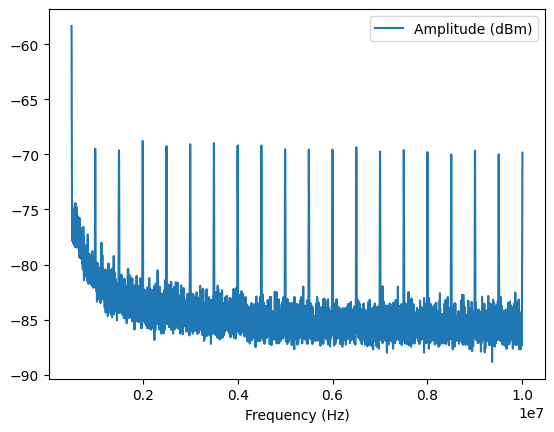

In [20]:
df.plot(x='Frequency (Hz)', y='Amplitude (dBm)')


In [320]:
EMCO_df = pd.read_csv(r"C:\Users\enfxm\Desktop\Python\TekBox EMI Calibration\EMI_CSV_FILES\1M-EMCO3810-LINE")
ATTEN_df = pd.read_csv(r"C:\Users\enfxm\Desktop\Python\TekBox EMI Calibration\EMI_CSV_FILES\1M-ATTEN166-LINE")

In [321]:
# ATTEN_df[' Amplitude (dBm)'] = ATTEN_df[' Amplitude (dBm)'] - 10

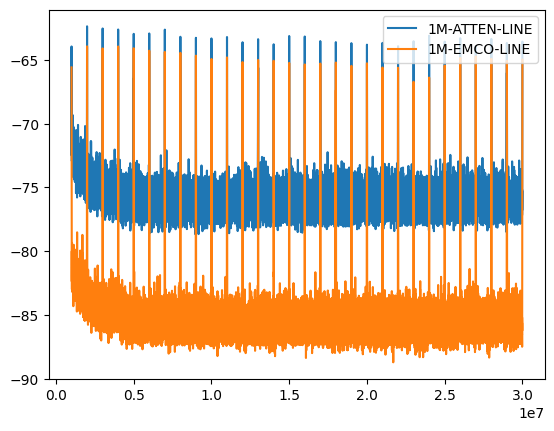

In [322]:


fig, ax = plt.subplots()



ax.plot(ATTEN_df['Frequency (Hz)'], ATTEN_df['Amplitude (dBm)'], label='1M-ATTEN-LINE')
ax.plot(EMCO_df['Frequency (Hz)'], EMCO_df['Amplitude (dBm)'], label='1M-EMCO-LINE')


ax.legend()
plt.show()

In [323]:
peaks_enco,_ = find_peaks(EMCO_df['Amplitude (dBm)'], height=-69)
peaks_atten,_ = find_peaks(ATTEN_df['Amplitude (dBm)'], height=-69)

EMCO_PEAKS_df = EMCO_df.iloc[peaks_enco]
ATTEN_PEAKS_df = ATTEN_df.iloc[peaks_atten]

# EMCO_PEAKS_df.plot(x='Frequency (Hz)', y='Amplitude (dBm)', marker='o')
# ATTEN_PEAKS_df.plot(x='Frequency (Hz)', y='Amplitude (dBm)', marker='o')

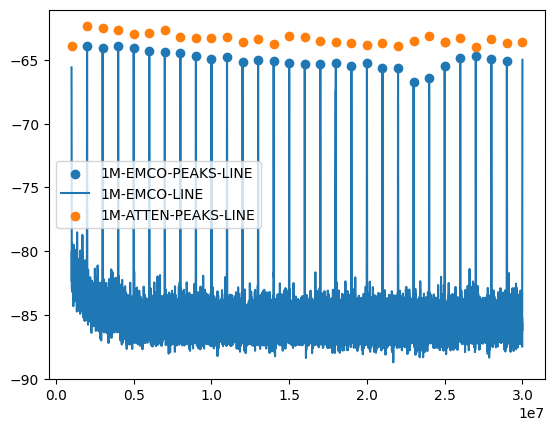

In [324]:
fig, ax = plt.subplots()



# ax.plot(ATTEN_df['Frequency(Hz)'], ATTEN_df[' Amplitude (dBm)'], label='1M-ATTEN-LINE')

ax.scatter(EMCO_PEAKS_df['Frequency (Hz)'], EMCO_PEAKS_df['Amplitude (dBm)'], label='1M-EMCO-PEAKS-LINE', marker='o')
ax.plot(EMCO_df['Frequency (Hz)'], EMCO_df['Amplitude (dBm)'], label='1M-EMCO-LINE')

ax.scatter(ATTEN_PEAKS_df['Frequency (Hz)'], ATTEN_PEAKS_df['Amplitude (dBm)'], label='1M-ATTEN-PEAKS-LINE', marker='o')

ax.legend()
plt.show()

In [325]:
ATTEN_avg = np.average(ATTEN_PEAKS_df['Amplitude (dBm)'])
EMCO_avg = np.average(EMCO_PEAKS_df['Amplitude (dBm)'])

delta = ATTEN_avg - EMCO_avg

print(delta)

1.6479147465437833
